# HW05: Classification and Deep Learning Essentials (due 31st October)

**As part of NEXT WEEK'S homework you will have to provide feedback to two of your classmates' essays on Moodle (by Friday Nov 3rd, at 23:59).** On Moodle, you will be automatically assigned to the two essays you have to provide feedback to on Monday Oct 30th at midnight, in case you want to start ahead.

In this homework, we focus again on a prediction task (as we did in week 3). Before diving into the coding part of the homework, I would like you to reflect on the following problem and how you would approach it.

*Suppose you are a policy advisor to a developing country government that would like to design a social security program to aid individuals with wages lower than \$1000 per month. However, data collection in this country is very hard due to the lack of technology infrastructures, incentives to misreport income, and geographical barriers. Therefore, you have access to some demographic and employment data at the individual level from all the municipalities in addition to geographical and municipality level features (here, you can be creative about which variables you have access to). However, you have access to income data only for a random set of municipalities.*

*How would you decide how to allocate the transfer using the methods you learned for this course? Be very specific on the method and the main variables you would use.*

**There is no right or wrong answer here. This is just a conceptual exercise to make you think about the methods we are learning about in real-life problems.** You don't need to write a lot about this; 100 words or even a scheme about your solution to this task would be enough.

**Answer:**

Problematic:

We want to design a social security to aid individuals with wages lower than $1000 per month. However, we don't have the list of individuals with their salary. We only have access to the income data for a random set of municipalities. 

Solution:

Using the demographic and employment data at the individual level from all the municipalities in addition to geographical and municiplity level features, we can use this data to predict the salary income over the whole municipalities.

Approach:
1. Data Exploration:
- Build our data by matching for each individual the corresponding demographic data, employment data and demographical and level features of his municipality.
- Analyze the available income data to understand its distribution and characteristics.
- Investigate correlations between income and the provided demographic, employment, geographical, and municipal features.

2. Feature Selection:
- Standardize the features.
- Select the relevant features.

3. Model selection:
- Take the labeled data that we have (salaries known) and split them into training, validation and testing.
- Train various regression models, such as XGBoost, linear regression, and random forests, on the training set.
- Evaluate each model's performance on the validation set using metrics like Mean Squared Error (MSE) and R-squared.

4. Model application:
- Use the best-performing model to predict incomes for individuals in municipalities without income data.
- Identify individuals whose predicted incomes are below the $1000 threshold.

## Coding Exercise

Another area of research that is increasingly employing machine learning is that of medical research (a great example of it is [Mullainathan and Obermeyer, 2021](https://www.nber.org/papers/w26168)). The correct prediction of who may encounter a critical clinical condition is fundamental for the allocation of treatments. Indeed, both treatment availability and doctors' time are not infinite. Therefore, correctly predicting who may be more likely to experience a heart attack or develop cancer is extremely important to help these people and not waste precious resources at the same time.

In the following, the main goal will be to predict the probability of a heart attack using some health indicators described below. **Note that these are fake data created following the pattern from a dataset with real health indicators.**

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/HW05.csv')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Attribute Information**

- age
- sex: 0 = female; 1 = male
- cp: chest pain type (4 values)
- trestbps: resting blood pressure
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl
- restecg: resting electrocardiographic results (values 0,1,2)
- thalach: maximum heart rate achieved
- exang: exercise induced angina
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- target: 0= less chance of heart attack 1= more chance of heart attack

In [93]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### XGboost

In this part you will build a classifier for the likelihood of having an heart attack using xgboost. You have to train, validate your classifier and print the most meaningful metrics.

In [94]:
import xgboost as xgb
from xgboost import XGBClassifier

## Split the sample into a training, a test set and a validation set

X = df.drop('target', axis=1)
y = df['target']

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=42)

## Train a classifier using early stopping and the logloss evaluation metric 
xgb_class = XGBClassifier(eval_metrics='logloss',
                          early_stopping_rounds=10)

xgb_class.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-logloss:0.60389
[1]	validation_0-logloss:0.54609
[2]	validation_0-logloss:0.51980
[3]	validation_0-logloss:0.50032
[4]	validation_0-logloss:0.46702
[5]	validation_0-logloss:0.45823
[6]	validation_0-logloss:0.43545
[7]	validation_0-logloss:0.42780
[8]	validation_0-logloss:0.42939
[9]	validation_0-logloss:0.41023
[10]	validation_0-logloss:0.40314
[11]	validation_0-logloss:0.41943
[12]	validation_0-logloss:0.41502
[13]	validation_0-logloss:0.42257
[14]	validation_0-logloss:0.42773
[15]	validation_0-logloss:0.42741
[16]	validation_0-logloss:0.43076
[17]	validation_0-logloss:0.43931
[18]	validation_0-logloss:0.43949
[19]	validation_0-logloss:0.43312
[20]	validation_0-logloss:0.42673


c:\Users\ronan\miniconda3\envs\robot-judge\lib\site-packages\xgboost\core.py:160: UserWarning: [13:03:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None,
              eval_metrics='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

Accuracy Score: 0.819672131147541


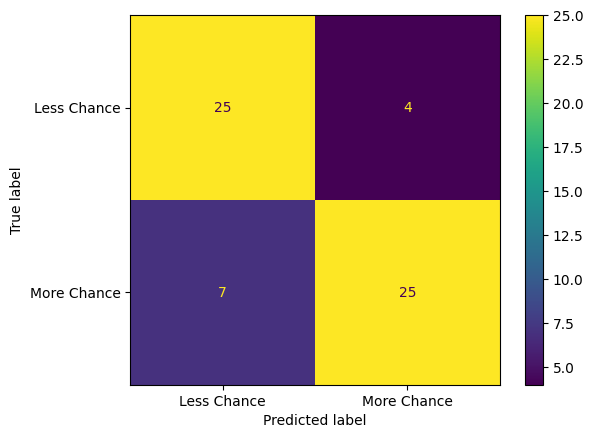

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

## Plot the confusion metrics and calculate the accuracy score
y_pred = xgb_class.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Less Chance", "More Chance"])
disp.plot()

print("Accuracy Score:", accuracy_score(y_test, y_pred))

**What can you say about the performance of your classifier based on these metrics?**

**Answer:**

The model have 82% accuracy. We can see from the confusion matrix that the model can detect most of the patients with less/more chance of heart attack but still missclassifies some of them.

**Which metrics are better suited to evaluate this model? Calculate and visualize these metrics, and comment on the performance of the model.**

**Answer:**

For this model we don't to miss a person that have chances of having a heartattack. If we wrongly classify person as having more chance of heartattack it is ok, they will be more healthy. Thus, we want a high recall. 

The model seems to have a recall that is not too bad but could be improved by choosing a lower threshold than 0.5.

In [96]:
from sklearn.metrics import (precision_score, recall_score, f1_score, precision_recall_curve,
                             balanced_accuracy_score, roc_curve, auc, roc_auc_score)

In [97]:
print("{:20s} {:.3f}".format("precision:", precision_score(y_test, y_pred)))
print("{:20s} {:.3f}".format("recall:", recall_score(y_test, y_pred)))
print("{:20s} {:.3f}".format("f1:",  f1_score(y_test, y_pred)))
print("{:20s} {:.3f}".format("balanced_accuracy:",  balanced_accuracy_score(y_test, y_pred)))

precision:           0.862
recall:              0.781
f1:                  0.820
balanced_accuracy:   0.822


In [98]:
y_scores = xgb_class.predict_proba(X_test)[:,1]

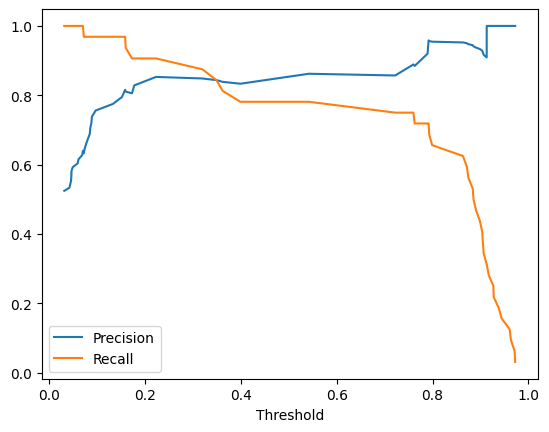

In [99]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel('Threshold')
plt.legend()

auc                  0.922


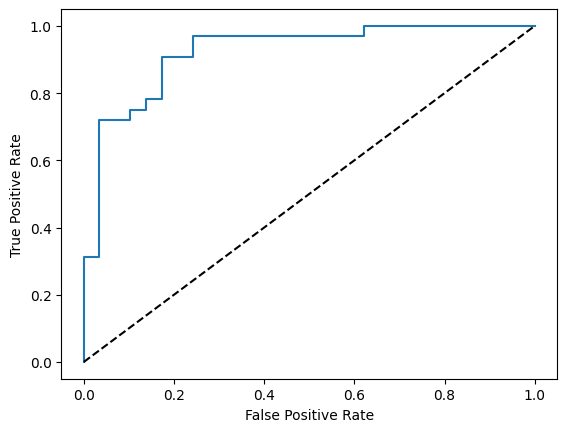

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("{:20s} {:.3f}".format("auc", roc_auc_score(y_test, y_scores)))

## Deep Learning

Now, you will build an analogous classifier, i.e., with the same objective as the one in the previous part, using a neural network structure. 

In [156]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

## build a MLP (multilayer perceptron) model to predict the outcome using 
# the same predictors as in the XGBoost model.
# the MLP model should have at least 2 hidden layers, ReLU activation
nn_model = nn.Sequential(
    nn.Linear(in_features=X.shape[1], out_features=10),
    nn.ReLU(),
    nn.Linear(10, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)


In [157]:
# define the loss function and the optimizer
loss_function = nn.BCELoss()
optimizer = optim.Adam(nn_model.parameters(), lr=0.001)

In [158]:
X = df.drop('target', axis=1)
y = df['target']

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=42)

# before bulding the model we will transform all our data to tensors
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
X_val = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
y_val = torch.tensor(y_val.to_numpy(), dtype=torch.float32).reshape(-1, 1)

In [159]:
#fit the model on the training data
import copy

# hold the best model
best_loss = np.inf
best_weights = None
best_epoch = 0

n_epochs = 319
batch_size = 64

for epoch in range(n_epochs):
    
    for i in range(0, len(X_train), batch_size):
        # take a batch
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        # forward pass
        y_pred = nn_model(X_batch)
        loss = loss_function(y_pred, y_batch)

        # backward pass
        optimizer.zero_grad()
        loss.backward()

        # update weights
        optimizer.step()
    
    # evaluate model at end of each epoch
    nn_model.eval()

    y_pred_val = nn_model(X_val)
    loss_val = loss_function(y_pred_val, y_val)
    loss_val = float(loss_val)

    if loss_val < best_loss:
        best_loss = loss_val
        best_epoch = epoch
        best_weights = copy.deepcopy(nn_model.state_dict())

    # print some information
    if epoch % 10 == 0:
        print(f'Finished epoch {epoch}, validation loss: {np.round(loss_val, 2)}')

Finished epoch 0, validation loss: 28.39
Finished epoch 10, validation loss: 0.78
Finished epoch 20, validation loss: 0.77
Finished epoch 30, validation loss: 0.74
Finished epoch 40, validation loss: 0.71
Finished epoch 50, validation loss: 0.68
Finished epoch 60, validation loss: 0.66
Finished epoch 70, validation loss: 0.65
Finished epoch 80, validation loss: 0.64
Finished epoch 90, validation loss: 0.63
Finished epoch 100, validation loss: 0.62
Finished epoch 110, validation loss: 0.62
Finished epoch 120, validation loss: 0.61
Finished epoch 130, validation loss: 0.61
Finished epoch 140, validation loss: 0.6
Finished epoch 150, validation loss: 0.6
Finished epoch 160, validation loss: 0.6
Finished epoch 170, validation loss: 0.59
Finished epoch 180, validation loss: 0.59
Finished epoch 190, validation loss: 0.59
Finished epoch 200, validation loss: 0.58
Finished epoch 210, validation loss: 0.58
Finished epoch 220, validation loss: 0.58
Finished epoch 230, validation loss: 0.57
Finis

In [167]:
#compute the test set accuracy, as well as the metrics you picked to evaluate the xgboost model
y_pred = nn_model(X_test).detach().numpy()
y_pred = (y_pred > 0.4).astype(int)
print("{:20s} {:.3f}".format("Accuracy Score:", accuracy_score(y_test, y_pred)))
print("{:20s} {:.3f}".format("precision:", precision_score(y_test, y_pred)))
print("{:20s} {:.3f}".format("recall:", recall_score(y_test, y_pred)))
print("{:20s} {:.3f}".format("f1:",  f1_score(y_test, y_pred)))
print("{:20s} {:.3f}".format("balanced_accuracy:",  balanced_accuracy_score(y_test, y_pred)))

Accuracy Score:      0.869
precision:           0.853
recall:              0.906
f1:                  0.879
balanced_accuracy:   0.867


**How does the NN-based classifier performs with respect to the XGBOOST one?**

**Answer:**

The model did slighlty better than the xgboost. If we diminish the thershold to have a better recall, we get significant improvements in our results.

**OPTIONAL QUESTION: Suppose that one of the classifiers you built performs very well, would you suggest using it to decide on the allocation of treatments to prevent heart attacks?**

Definitely. I would of course have to take a better look at the source of the data, otherwise, yes. It would also push people to take better care of themselves